# Modeling

We know from our EDA that we have some outliers in our data. We also know that metrics such as Mean-Squared-Error and Root-Mean-Squared-Error are very sensetive to outliers. We decided to try both MAE and MSE to see which score would be better. And also, we will look at the difference between train and test score to see if our model overfitt or not.

## 1. Import data

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge

import warnings
warnings.filterwarnings('ignore')

In [2]:
freedom_happiness_df = pd.read_csv('data/P5clean.csv')

## 2. Test Linear Regression model with all features

In [3]:
# Preprocessing

# We wanted to exclude columns (year, life_lader, overall_score and country name from our features)
# 'overall_score' is an average of all features, use it instead of all economic features to try different variations.

X = freedom_happiness_df.drop(columns=['year', 'life_ladder', 'overall_score', 'country_name'])
y = freedom_happiness_df['life_ladder']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#not necessary for linear regression
#will be use for Lasso and Ridge regularization 
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [4]:
# Modelimg

lm = LinearRegression(n_jobs = -1)

lm.fit(X_train, y_train)

print(f'train score: {lm.score(X_train, y_train)}')
print(f'test score: {lm.score(X_test, y_test)}')

odd=lm.predict(X_test)

print('----------------------------------------')
print('MSE:', mean_squared_error(y_test, odd))
print('MAE:', mean_absolute_error(y_test, odd))
print(f'R2: {r2_score(y_test, odd)}')

train score: 0.76761022056187
test score: 0.77661309492023
----------------------------------------
MSE: 0.2809793910958864
MAE: 0.4067081701200668
R2: 0.77661309492023


In [5]:
lm.coef_

array([-3.07140007e-04, -4.40575272e-03, -5.68924659e-03, -1.55615557e-03,
        2.26666663e-03, -2.65045806e-03,  9.00115811e-04, -7.27553026e-03,
        1.47926983e-03,  4.47976755e-03,  4.04550854e-01,  1.91293243e+00,
        2.23871977e-02,  5.55771200e-01,  3.66515479e-01, -5.79755751e-01,
        1.95625631e+00,  1.95297406e-02])

In [6]:
# We can look at our predictions how close we are to original

pred_test_df = pd.DataFrame(data=[i for i in zip(y_test[:5].values, odd[:5])], columns = ['Actual', 'Predicted'])
pred_test_df['Difference'] = pred_test_df['Actual'] - pred_test_df['Predicted']
pred_test_df

,Actual,Predicted,Difference
0,5.457,5.440353,0.016647
1,3.671,4.058061,-0.387061
2,7.671,7.071452,0.599548
3,6.294,5.423991,0.870009
4,5.004,4.413869,0.590131


- Our predictions are pretty good, but the model is a little bit overfit. The standard scaler didn't have any affect to our model and we decided don't use it for next few models.

## 3. Linear Regression and Economic Features Only

In [7]:
#We would like to see how economic features would affect our model and happiness.

Economic_features = freedom_happiness_df.drop(columns = ['log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth', 'choice_freedom',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect', 'country_name', 'life_ladder','life_ladder',
       'country_name', 'year', 'overall_score'])

In [8]:
# Modeling

X2 = Economic_features
y2 = freedom_happiness_df['life_ladder']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 42)

lm.fit(X_train2, y_train2)

odd2=lm.predict(X_test2)

print(f' economic train: {lm.score(X_train2, y_train2)}')
print(f' economic test: {lm.score(X_test2, y_test2)}')
print('----------------------------------------')
print('MSE:', mean_squared_error(y_test2, odd2))
print('MAE:', mean_absolute_error(y_test2, odd2))
print(f'R2: {r2_score(y_test2, odd2)}')

 economic train: 0.5173878163687028
 economic test: 0.5716161347505673
----------------------------------------
MSE: 0.538827634368745
MAE: 0.5696537526417473
R2: 0.5716161347505673


- our score dropped and we have very overfitting model

## 3. Linear Regression and features from happiness dataset/report

In [9]:
Happiness_features = freedom_happiness_df.drop(columns = ['life_ladder', 'country_name', 'year', 'overall_score','property_rights', 
                                   'government_integrity', 'tax_burden', 'government_spending', 'business_freedom',
                                     'labor_freedom','monetary_freedom', 'trade_freedom', 'investment_freedom','financial_freedom'])

In [10]:
# Modeling

X3 = Happiness_features
y3 = freedom_happiness_df['life_ladder']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, random_state = 42)

lm.fit(X_train3, y_train3)

print(f'R2 happiness train: {lm.score(X_train3, y_train3)}')
print(f'R2 happiness test: {lm.score(X_test3, y_test3)}')

R2 happiness train: 0.7562259743234683
R2 happiness test: 0.7582893286308159


- This is very close to our 1st model

## 4.  Lasso

We wanted to see if models such as Lasso or Ridge could improve our score

In [11]:
lasso = Lasso()
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print('training score', lasso.score(X_train, y_train))
print('testing score', lasso.score(X_test,y_test))
print('----------------------------------------')
print('MSE', mean_squared_error(y_test, lasso_pred))
print('MAE:', mean_absolute_error(y_test, lasso_pred))
print(f'R2: {r2_score(y_test, lasso_pred)}')

training score 0.59478273468815
testing score 0.6207398869180571
----------------------------------------
MSE 0.477039043997086
MAE: 0.5562621367664375
R2: 0.6207398869180571


## 5.  Ridge

In [12]:
#Instantiate

ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print('training score', ridge.score(X_train, y_train))
print('testing score', ridge.score(X_test, y_test))
print('----------------------------------------')
print('MSE', mean_squared_error(y_test, ridge_pred))
print('MAE', mean_absolute_error(y_test,ridge_pred))
print(f'R2: {r2_score(y_test, ridge_pred)}')

training score 0.7672226765615445
testing score 0.7763920000098308
----------------------------------------
MSE 0.28125748758178465
MAE 0.40798613116164795
R2: 0.7763920000098308


# Random Forest Regressor (no tuning)

In [13]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9831560011854079

In [14]:
rf.score(X_test, y_test)

0.8770374965722614

## 5. GridSearch best parameters for Random Forest to avoid overfitting

In [15]:
# Search for the best param for Random Forest

rf=RandomForestRegressor()

pipe_param={'n_estimators':[50,300],
            'max_depth':[None, 2 ],
            'min_samples_split':[10, 30],
             'min_samples_leaf': [10, 20, 30, 40],
             'max_features':['auto',0.1]}
    

rf_gridsearcher=GridSearchCV(rf, pipe_param, verbose=1)

rf_gridsearcher.fit(X_train,y_train)

print('Best score:', rf_gridsearcher.best_score_)
print('Best Estimator:', rf_gridsearcher.best_estimator_)
print('Best parameters:', rf_gridsearcher.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best score: 0.8409052341965442
Best Estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=10,
                      n_estimators=300)
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [16]:
rf.score

<bound method RegressorMixin.score of RandomForestRegressor()>

In [17]:
# Search for the best param for Random Forest

rf=RandomForestRegressor()

# pipe_param={'n_estimators':[50,300],
#             'max_depth':[None, 2 ],
#             'min_samples_split':[10, 30],
#              'min_samples_leaf': [10, 20, 30, 40],
#              'max_features':['auto',0.1]}
    

rf_gridsearcher=GridSearchCV(rf, pipe_param, verbose=1)

rf_gridsearcher.fit(X_train,y_train)

print('Best score:', rf_gridsearcher.best_score_)
print('Best Estimator:', rf_gridsearcher.best_estimator_)
print('Best parameters:', rf_gridsearcher.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best score: 0.8409397198541351
Best Estimator: RandomForestRegressor(min_samples_leaf=10, min_samples_split=10,
                      n_estimators=300)
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


## 6. Random Forest

In [18]:
# Modeling

rf=RandomForestRegressor(n_estimators = 1000, min_samples_leaf= 80, max_features = 0.5,  min_samples_split=60, max_samples =800)

rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print(f'train score:{rf.score(X_train, y_train)}')
print(f'test score: {rf.score(X_test, y_test)}')
print('----------------------------------------')
print('MSE:', mean_squared_error(y_test, rf_pred))
print('MAE:', mean_absolute_error(y_test, rf_pred))
print(f'R2: {r2_score(y_test, rf_pred)}')

train score:0.7617348630319007
test score: 0.7494435126051746
----------------------------------------
MSE: 0.31515369819095873
MAE: 0.4437436605828364
R2: 0.7494435126051746


## 7. Ridge and Best Features from EDA

In [19]:
# Preprocessing only features that corellated more than %50

X4 = freedom_happiness_df[[ 'overall_score', 'perceptions_of_corruption','log_gdp_per_capita', 
                           'social_support', 'healthy_life_expectancy_at_birth','government_integrity']]
y4 = freedom_happiness_df.life_ladder

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, random_state = 42)

In [20]:
# Modeling

ridge.fit(X_train4, y_train4)

ridge_pred4 = ridge.predict(X_test4)

print('training score', ridge.score(X_train4, y_train4))
print('testing score', ridge.score(X_test4,y_test4))
print('----------------------------------------')
print('MSE', mean_squared_error(y_test4, ridge_pred4))
print('MAE:', mean_absolute_error(y_test4, ridge_pred4))
print(f'R2: {r2_score(y_test4, ridge_pred4)}')

training score 0.7091044187181799
testing score 0.7234858693991141
----------------------------------------
MSE 0.34780361014402805
MAE: 0.4641968096674058
R2: 0.7234858693991141


## 8. Plot The best model

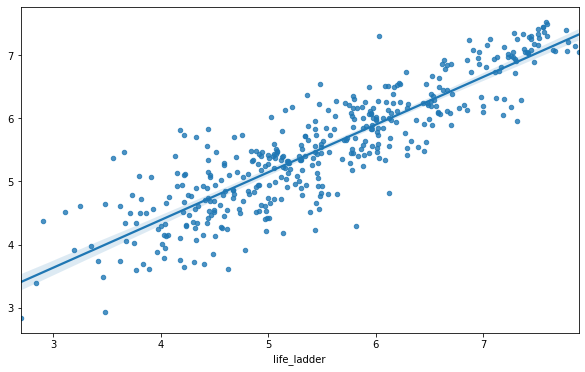

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(y_test, odd, scatter_kws={"s": 20});

## 9. Conclusion

In this notebook we've tried 4 models Linear Regression, Lasso, Ridge and Random Forest to predict happiness. We used a Grid Search to find better parameters for our model. We also wanted to see how just features from freedom dataset and features from happiness dataset would affect our model. Our results were following:

| MODEL                            | SCORE                 |
|----------------------------------|-----------------------|
| Linear Regression + all features |  MSE: 0.28            |
|                                  |  MAE: 0.41            |
|                                  |  R2:  0.78            |
|----------------------------------|-----------------------|
| Linear Regression +              | train score: 0.52     |
| Economic features                | R2 test score: 0.57   |
|----------------------------------|-----------------------|
| Linear Regression +              | train score: 0.76     |
| Happiness features               | test score: 0.76      |
|----------------------------------|-----------------------|
|                                  | train score: 0.59     |
|                                  | test score: 0.62      |
| Lasso                            |  MSE: 0.47            |
|                                  |  MAE: 0.56            |
|                                  |  R2:  0.62            |
|----------------------------------|-----------------------|
|                                  | train score: 0.77     |
|                                  | test score: 0.78      |
| Ridge                            |  MSE: 0.28            |
|                                  |  MAE: 0.41            |
|                                  |  R2:  0.78            |
|----------------------------------|-----------------------|
|                                  | train score: 0.76     |
|                                  | test score: 0.75      |
| Random Forest                    |  MSE: 0.31            |
|                                  |  MAE: 0.44            |
|                                  |  R2:  0.75            |
|----------------------------------|-----------------------|
|                                  | train score: 0.70     |
|                                  | test score: 0.72      |
| Ridge Model + Best Features      |  MSE: 0.34            |
|                                  |  MAE: 0.46            |
|                                  |  R2:  0.72            |
|----------------------------------|-----------------------|


- Even we have outliers, MSE score was lower than MAE. While experimenting with RF, the MAE was more stable than MSE.
- The Lasso was a good model to prevent overfitting, but MSE and MAE increased almost in 2 times.
- The Ridge gave same results as standard Linear Regression. Model is not overfit and errors are low enought.
- Random Forest gives higher R2 score and lower error scores, but it is hard to avoid overfitting.
- If we take only 6 best features from EDA and see how they would predict the happiness, the best model would be Ridge if we want to avoid overfitting and have nice scores.
- Economic features don't overfit, but score are low and errors are high.
- ***Overall, the Ridge or Linear Regression were the best models and best features were all features from dataset.***